# Pattern Screamers Sound

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Loading Image

In [3]:
image_path = 'thescreamer.png'
img = cv2.imread(image_path)

### Visualizing Image

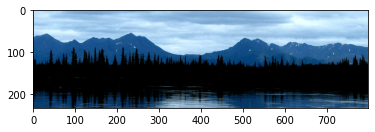

In [4]:
b,g,r = cv2.split(img)
frame_rgb = cv2.merge((r,g,b))
plt.imshow(frame_rgb)

### Image Segmentation using K-means

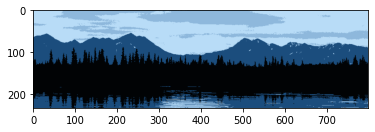

In [5]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts=10
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
plt.imshow(result_image)

### Creating a mask to remove background

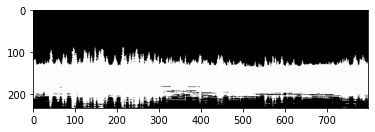

In [6]:
img = result_image
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
low = (0, 0, 0)
high = (100,100, 100)
mask = cv2.inRange(rgb_img, low, high)
img = cv2.bitwise_not(img)
signal = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(signal)



### Cropping image to use only the top half

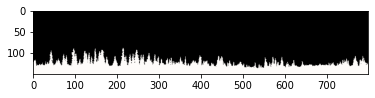

In [7]:
img = result_image[0:150]
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
low = (0, 0, 0)
high = (100,100, 100)
mask = cv2.inRange(rgb_img, low, high)
img = cv2.bitwise_not(img)
signal = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(signal)



### Getting the image contours 

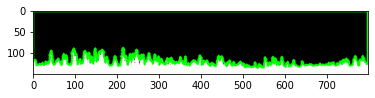

In [8]:

imgray = cv2.cvtColor(signal, cv2.COLOR_BGR2GRAY)
imgray = 255 - imgray

ret, thresh = cv2.threshold(imgray, 250, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
perimeter = [cv2.arcLength(cnt,True) for cnt in contours ]
biggestC = np.max(perimeter)
contIndex = perimeter.index(biggestC)

a = cv2.drawContours(signal,contours,contIndex,(0,255,0),3)
plt.imshow(a)
mainCnt = contours[contIndex]

### Getting the signal

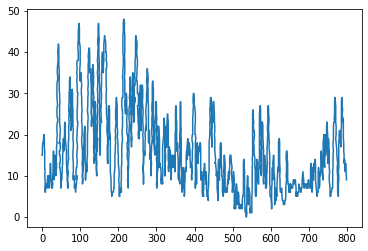

In [9]:
signalArray = np.array(mainCnt)
x_and_y = signalArray.flatten('F')
half_vector = int(x_and_y.shape[0]/2)

x_withBorders = x_and_y[:half_vector]
y_inverted = x_and_y[half_vector:] 
y_withBorders = np.max(y_inverted) - y_inverted

x = x_withBorders[1:len(x_withBorders) - 1]
y = y_withBorders[1:len(y_withBorders) - 1]

plt.plot(x,y)

### Creating the sound signal

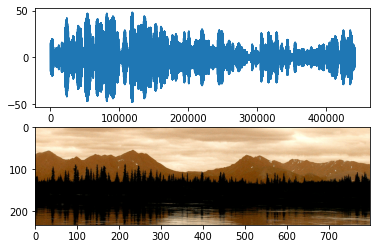

In [10]:
from scipy.interpolate import interp1d

time = 5
xnew = np.linspace(0, 798, num=44_100*time, endpoint=True)
signal = interp1d(x, y)
half_sound = signal(xnew)

sound = []
for i in half_sound:
    sound.append(i)
    sound.append(-i)

sound = np.array(sound)
path = 'thescreamer.png'
img = cv2.imread(path)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(sound)
ax2.imshow(img)

### Saving the 'thescreamer.wav' sound file

In [11]:
from scipy.io.wavfile import write
samplerate = 44100
write("thescreamer.wav", samplerate, sound)